<a href="https://colab.research.google.com/github/assiou349/DS_Case-Study/blob/main/think_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

Downloaded thinkstats.py


In [5]:
try:
    import empiricaldist
except ImportError:
    %pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.9.0-py3-none-any.whl size=14297 sha256=21f6eb7af865b1fffe19ecdad401bcbcf3fedfbfd8384938a15c4a95a6a37864
  Stored in directory: /root/.cache/pip/wheels/26/56/da/ea90b6b66dc5e72379a64e2819815066873f00c1350126e876
Successfully built empiricaldist


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import HTML
from thinkstats import decorate

In [7]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [8]:
try:
    import statadict
except ImportError:
    %pip install statadict

In [9]:
from statadict import parse_stata_dict


def read_stata(dct_file, dat_file):
    stata_dict = parse_stata_dict(dct_file)
    resp = pd.read_fwf(
        dat_file,
        names=stata_dict.names,
        colspecs=stata_dict.colspecs,
        compression="gzip",
    )

    return resp

In [10]:
dct_file = "2002FemPreg.dct"
dat_file = "2002FemPreg.dat.gz"

In [11]:
preg = read_stata(dct_file, dat_file)

In [12]:
preg.shape

(13593, 243)

In [13]:
preg.head()


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231


In [14]:
preg.columns


Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'poverty_i', 'laborfor_i', 'religion_i', 'metro_i', 'basewgt',
       'adj_mod_basewgt', 'finalwgt', 'secu_p', 'sest', 'cmintvw'],
      dtype='object', length=243)

In [15]:
pregordr = preg["pregordr"]
type(pregordr)

pandas.core.series.Series

In [16]:
pregordr.head()

,pregordr
0,1
1,2
2,1
3,2
4,3


In [17]:
preg["outcome"].value_counts().sort_index()


,count
outcome,
1,9148
2,1862
3,120
4,1921
5,190
6,352


In [18]:
counts = preg["birthwgt_lb"].value_counts(dropna=False).sort_index()
counts

,count
birthwgt_lb,
0.0,8
1.0,40
2.0,53
3.0,98
4.0,229
5.0,697
6.0,2223
7.0,3049
8.0,1889


In [19]:
counts.loc[0:5]

,count
birthwgt_lb,
0.0,8
1.0,40
2.0,53
3.0,98
4.0,229
5.0,697


In [20]:
counts.loc[0:5].sum()

np.int64(1125)

In [21]:
preg["birthwgt_lb"] = preg["birthwgt_lb"].replace([51, 97, 98, 99], np.nan)


In [22]:
preg["agepreg"].mean()


np.float64(2468.8151197039497)

In [23]:
preg["agepreg"] /= 100.0


In [24]:
preg["agepreg"].mean()


np.float64(24.6881511970395)

In [25]:
preg["birthwgt_oz"].value_counts(dropna=False).sort_index()


,count
birthwgt_oz,
0.0,1037
1.0,408
2.0,603
3.0,533
4.0,525
5.0,535
6.0,709
7.0,501
8.0,756


In [26]:
preg["birthwgt_oz"] = preg["birthwgt_oz"].replace([97, 98, 99], np.nan)


In [27]:
preg["totalwgt_lb"] = preg["birthwgt_lb"] + preg["birthwgt_oz"] / 16.0
preg["totalwgt_lb"].mean()

np.float64(7.265628457623368)

In [28]:
weights = preg["totalwgt_lb"]
n = weights.count()
n

np.int64(9038)

In [29]:
mean = weights.sum() / n
mean

np.float64(7.265628457623368)

In [30]:
weights.mean()


np.float64(7.265628457623368)

In [31]:
squared_deviations = (weights - mean) ** 2


In [32]:
var = squared_deviations.sum() / n
var

np.float64(1.983070989750022)

In [33]:
weights.var()


1.9832904288326532

In [34]:
weights.var(ddof=0)


1.9830709897500207

In [35]:
std = np.sqrt(var)
std

np.float64(1.40821553384062)

In [36]:
weights.std(ddof=0)


1.4082155338406195

In [37]:
subset = preg.query("caseid == 10229")
subset.shape

(7, 244)

In [38]:
subset["outcome"].values


array([4, 4, 4, 4, 4, 4, 1])

In [39]:
from empiricaldist import FreqTab


In [40]:
t = [1.0, 2.0, 2.0, 3.0, 5.0]


In [41]:
ftab = FreqTab.from_seq(t)
ftab

,
1.0,1
2.0,2
3.0,1
5.0,1


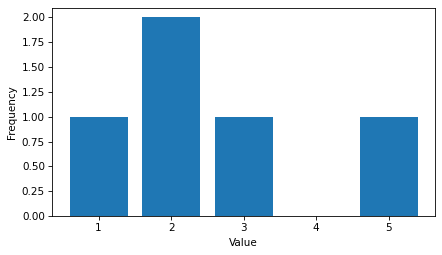

In [42]:
ftab.bar()
decorate(xlabel="Value", ylabel="Frequency")

In [43]:
ftab[2.0]


np.int64(2)

In [44]:
ftab(2.0)


np.int64(2)

In [45]:
ftab(4.0)


0

In [46]:
ftab.qs


array([1., 2., 3., 5.])

In [47]:
ftab.fs


array([1, 2, 1, 1])

In [48]:
for x, freq in ftab.items():
    print(x, freq)

1.0 1
2.0 2
3.0 1
5.0 1


In [49]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

Downloaded nsfg.py


In [50]:
from nsfg import read_fem_preg

preg = read_fem_preg()

In [51]:
live = preg.query("outcome == 1")


In [52]:
ftab_lb = FreqTab.from_seq(live["birthwgt_lb"], name="birthwgt_lb")


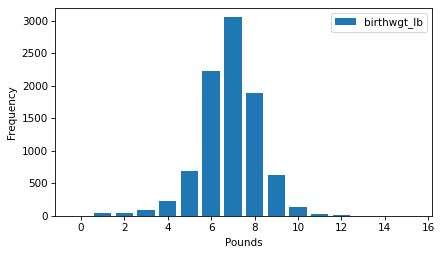

In [53]:
ftab_lb.bar()
decorate(xlabel="Pounds", ylabel="Frequency")

In [54]:
ftab_lb.idxmax() #mode


np.float64(7.0)

In [55]:
ftab_lb.mode()


np.float64(7.0)

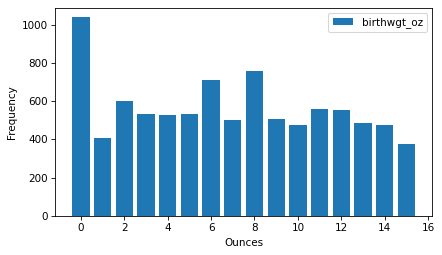

In [56]:
ftab_oz = FreqTab.from_seq(live["birthwgt_oz"], name="birthwgt_oz")
ftab_oz.bar()
decorate(xlabel="Ounces", ylabel="Frequency")

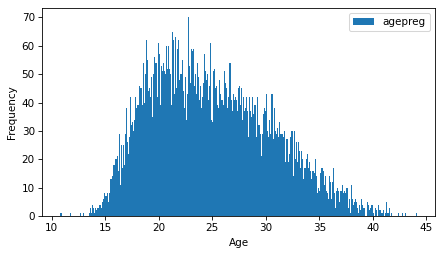

In [57]:
ftab_age = FreqTab.from_seq(live["agepreg"], name="agepreg")
ftab_age.bar(width=0.1)
decorate(xlabel="Age", ylabel="Frequency")

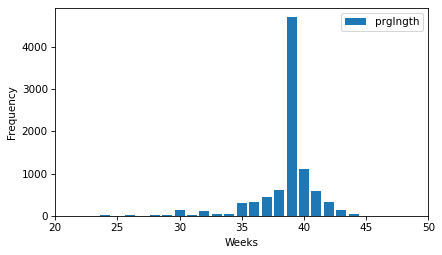

In [58]:
ftab_length = FreqTab.from_seq(live["prglngth"], name="prglngth")
ftab_length.bar()
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [59]:
def smallest(ftab, n=10):
    return ftab[:n]

In [60]:
smallest(ftab_length)

,prglngth
prglngth,
0,1
4,1
9,1
13,1
17,2
18,1
19,1
20,1
21,2


In [61]:
def largest(ftab, n=10):
    return ftab[-n:]

In [62]:
largest(ftab_length)


,prglngth
prglngth,
40,1116
41,587
42,328
43,148
44,46
45,10
46,1
47,1
48,7


In [63]:
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

In [64]:
ftab_first = FreqTab.from_seq(firsts["prglngth"], name="firsts")
ftab_other = FreqTab.from_seq(others["prglngth"], name="others")

In [65]:
def two_bar_plots(ftab1, ftab2, width=0.45):
    ftab1.bar(align="edge", width=-width)
    ftab2.bar(align="edge", width=width, alpha=0.5)

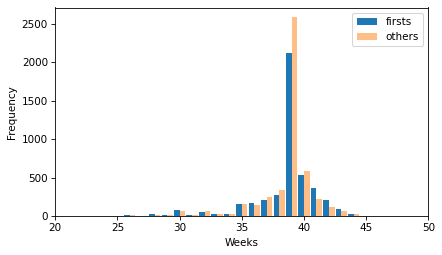

In [66]:
two_bar_plots(ftab_first, ftab_other)
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [67]:
firsts["prglngth"].count(), others["prglngth"].count()


(np.int64(4413), np.int64(4735))

In [68]:
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean

(np.float64(38.60095173351461), np.float64(38.52291446673706))

In [69]:
diff = first_mean - other_mean


In [70]:
diff, diff * 7 * 24


(np.float64(0.07803726677754952), np.float64(13.11026081862832))

In [71]:
diff / live["prglngth"].mean() * 100


np.float64(0.20237586646738304)

In [72]:
diff / live["prglngth"].std()


np.float64(0.028877623375210333)

In [73]:
group1, group2 = firsts["prglngth"], others["prglngth"]


In [74]:
v1, v2 = group1.var(), group2.var()


In [75]:
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

In [76]:
np.sqrt(pooled_var)


np.float64(2.702210814495382)

In [77]:
firsts["prglngth"].std(), others["prglngth"].std()


(2.7919014146686947, 2.615852350439255)

In [78]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()

    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

    return diff / np.sqrt(pooled_var)

In [79]:
cohen_effect_size(firsts["prglngth"], others["prglngth"])


np.float64(0.028879044654449883)

#3. Probability Mass Functions

In [80]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [81]:
try:
    import empiricaldist
except ImportError:
    %pip install empiricaldist

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate

In [83]:
from empiricaldist import FreqTab

ftab = FreqTab.from_seq([1, 2, 2, 3, 5])
ftab

,
1,1
2,2
3,1
5,1


In [84]:
n = ftab.sum()
n

np.int64(5)

In [85]:
pmf = ftab / n
pmf

,
1,0.2
2,0.4
3,0.2
5,0.2


In [86]:
pmf.sum()

np.float64(1.0)

In [87]:
from empiricaldist import Pmf

pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,
1,0.2
2,0.4
3,0.2
5,0.2


In [88]:
pmf.sum()

np.float64(1.0)

In [89]:
pmf[2]

np.float64(0.4)

In [90]:
pmf(2)

np.float64(0.4)

In [91]:
pmf[2] += 0.3
pmf[2]

np.float64(0.7)

In [92]:
pmf[2] *= 0.5
pmf[2]

np.float64(0.35)

In [93]:
pmf.sum()

np.float64(0.95)

In [94]:
pmf.normalize()

np.float64(0.95)

In [95]:
pmf.copy()

,
1,0.210526
2,0.368421
3,0.210526
5,0.210526


In [96]:
pmf.qs

array([1, 2, 3, 5])

In [97]:
pmf.ps

array([0.21052632, 0.36842105, 0.21052632, 0.21052632])

In [98]:
mean = np.sum(pmf.ps * pmf.qs)
mean

np.float64(2.6315789473684212)

In [99]:
deviations = pmf.qs - mean


In [100]:
deviations

array([-1.63157895, -0.63157895,  0.36842105,  2.36842105])

In [101]:
var = np.sum(pmf.ps * deviations**2)
var

np.float64(1.9168975069252079)

In [102]:
pmf.var()


np.float64(1.9168975069252079)

In [103]:
np.sqrt(var)


np.float64(1.3845206776806216)

In [104]:
pmf.std()

np.float64(1.3845206776806216)

In [105]:
pmf.mode()

np.int64(2)

In [106]:
ranges = pd.interval_range(start=5, end=50, freq=5, closed="left")
ranges.name = "class size"

data = pd.DataFrame(index=ranges)
data["count"] = [8, 8, 14, 4, 6, 12, 8, 3, 2]
data

,count
class size,
"[5, 10)",8
"[10, 15)",8
"[15, 20)",14
"[20, 25)",4
"[25, 30)",6
"[30, 35)",12
"[35, 40)",8
"[40, 45)",3
"[45, 50)",2


In [107]:
sizes = ranges.left + 2
sizes

Index([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype='int64')

In [108]:
counts = data["count"]
actual_pmf = Pmf(counts, sizes, name="actual")
actual_pmf.normalize()

np.int64(65)

In [109]:
actual_pmf

,actual
7,0.123077
12,0.123077
17,0.215385
22,0.061538
27,0.092308
32,0.184615
37,0.123077
42,0.046154
47,0.030769


In [110]:
actual_pmf.mean()


np.float64(23.692307692307693)

In [111]:
def bias(pmf, name):
    # multiply each probability by class size
    ps = pmf.ps * pmf.qs

    # make a new Pmf and normalize it
    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [112]:
observed_pmf = bias(actual_pmf, name="observed")


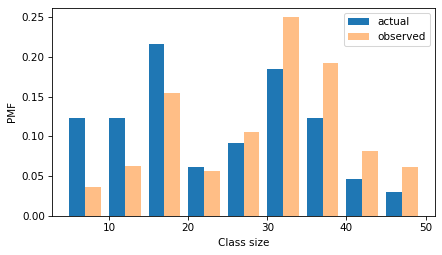

In [113]:
from thinkstats import two_bar_plots

two_bar_plots(actual_pmf, observed_pmf, width=2)
decorate(xlabel="Class size", ylabel="PMF")

In [114]:
observed_pmf.mean()


np.float64(29.123376623376622)

In [115]:
def unbias(pmf, name):
    # divide each probability by class size
    ps = pmf.ps / pmf.qs

    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [116]:
debiased_pmf = unbias(observed_pmf, "debiased")
debiased_pmf.mean()

np.float64(23.692307692307693)

In [117]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

In [118]:
try:
    import statadict
except ImportError:
    %pip install statadict

In [119]:
try:
    import statadict
except ImportError:
    %pip install statadict

In [120]:
from nsfg import get_nsfg_groups

live, firsts, others = get_nsfg_groups()

In [121]:
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,1234,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,1234,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000


In [122]:
first_pmf = Pmf.from_seq(firsts["prglngth"], name="firsts")
other_pmf = Pmf.from_seq(others["prglngth"], name="others")

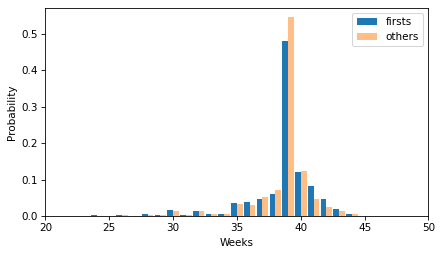

In [123]:
two_bar_plots(first_pmf, other_pmf)
decorate(xlabel="Weeks", ylabel="Probability", xlim=[20, 50])

In [124]:
weeks = range(35, 46)
first_pmf(weeks)

array([0.03602991, 0.03897575, 0.04713347, 0.06163608, 0.4790392 ,
       0.12145932, 0.08157716, 0.04645366, 0.01971448, 0.00521187,
       0.00135962])

In [125]:
other_pmf(weeks)


array([0.03210137, 0.03146779, 0.05216473, 0.07074974, 0.54466737,
       0.12249208, 0.04794087, 0.02597677, 0.01288279, 0.00485744,
       0.00084477])

In [126]:
diffs = first_pmf(weeks) - other_pmf(weeks)
diffs

array([ 0.00392854,  0.00750796, -0.00503126, -0.00911366, -0.06562817,
       -0.00103276,  0.03363629,  0.02047689,  0.00683169,  0.00035443,
        0.00051485])

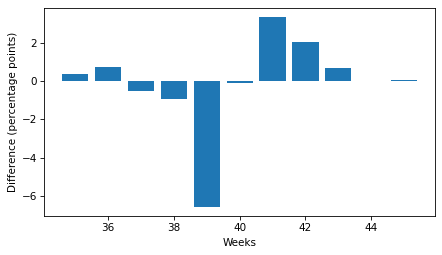

In [127]:
plt.bar(weeks, diffs * 100)
decorate(xlabel="Weeks", ylabel="Difference (percentage points)")

In [128]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/relay.py")
download(
    "https://github.com/AllenDowney/ThinkStats/raw/v3/data/Apr25_27thAn_set1.shtml"
)

Downloaded relay.py
Downloaded Apr25_27thAn_set1.shtml


In [129]:
from relay import read_results

results = read_results()
results.head()

,Place,Div/Tot,Division,Guntime,Nettime,Min/Mile,MPH
0,1,1/362,M2039,30:43,30:42,4:57,12.121212
1,2,2/362,M2039,31:36,31:36,5:06,11.764706
2,3,3/362,M2039,31:42,31:42,5:07,11.726384
3,4,4/362,M2039,32:28,32:27,5:14,11.464968
4,5,5/362,M2039,32:52,32:52,5:18,11.320755


In [130]:
speeds = results["MPH"].values


In [131]:
my_result = results.query("Nettime == '42:44'")
my_result

,Place,Div/Tot,Division,Guntime,Nettime,Min/Mile,MPH
96,97,26/256,M4049,42:48,42:44,6:53,8.716707


In [132]:
my_speed = speeds[96]


In [133]:
(speeds <= my_speed).sum()


np.int64(1537)

In [134]:
(speeds <= my_speed).mean() * 100


np.float64(94.12124923453766)

In [135]:
def percentile_rank(x, seq):
    """Percentile rank of x.

    x: value
    seq: sequence of values

    returns: percentile rank 0-100
    """
    return (seq <= x).mean() * 100

In [136]:
my_division = results.query("Division == 'M4049'")
my_division_speeds = my_division["MPH"].values

In [137]:
percentile_rank(my_speed, my_division_speeds)


np.float64(90.234375)

In [138]:
def percentile(p, seq):
    n = len(seq)
    i = (1 - p / 100) * (n + 1)
    return seq[round(i)]

In [139]:
percentile(90, my_division_speeds)


np.float64(8.591885441527447)

In [140]:
next_division = results.query("Division == 'M5059'")
next_division_speeds = next_division["MPH"].values

percentile(90.2, next_division_speeds)

np.float64(8.017817371937639)

In [141]:
next_division.query("MPH > 8.01").tail(1)


,Place,Div/Tot,Division,Guntime,Nettime,Min/Mile,MPH
222,223,18/171,M5059,46:30,46:25,7:29,8.017817


In [142]:
t = [1, 2, 2, 3, 5]


In [143]:
from empiricaldist import Pmf

pmf = Pmf.from_seq(t)
pmf

,
1,0.2
2,0.4
3,0.2
5,0.2


In [144]:
pmf[2]


np.float64(0.4)

In [145]:
cdf = pmf.make_cdf()
cdf

,
1,0.2
2,0.6
3,0.8
5,1.0


In [146]:
cdf[2]

np.float64(0.6000000000000001)

In [147]:
cdf(3)


array(0.8)

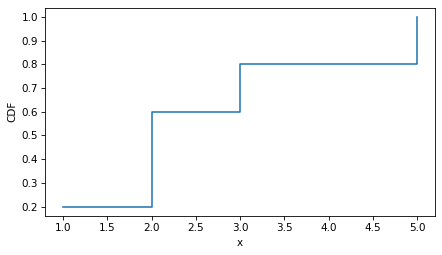

In [148]:
cdf.step()
decorate(xlabel="x", ylabel="CDF")

In [149]:
from empiricaldist import Cdf

cdf_speeds = Cdf.from_seq(speeds)

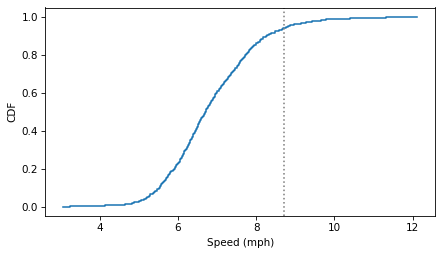

In [150]:
cdf_speeds.step()
plt.axvline(my_speed, ls=":", color="gray")
decorate(xlabel="Speed (mph)", ylabel="CDF")

In [151]:
cdf_speeds(my_speed) * 100


np.float64(94.12124923453766)

In [152]:
cdf_speeds.inverse(0.5)


array(6.70391061)

In [153]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

In [154]:
from nsfg import get_nsfg_groups

live, firsts, others = get_nsfg_groups()

In [155]:
first_weights = firsts["totalwgt_lb"].dropna()
first_weights.mean()

np.float64(7.201094430437772)

In [156]:
other_weights = others["totalwgt_lb"].dropna()
other_weights.mean()

np.float64(7.325855614973262)

In [157]:
from empiricaldist import Pmf

first_pmf = Pmf.from_seq(first_weights, name="first")
other_pmf = Pmf.from_seq(other_weights, name="other")

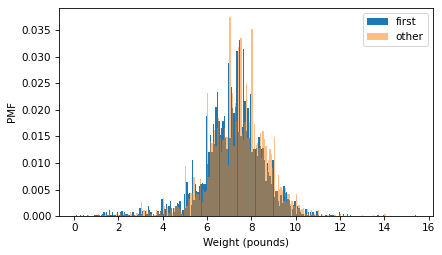

In [158]:
from thinkstats import two_bar_plots

two_bar_plots(first_pmf, other_pmf, width=0.06)
decorate(xlabel="Weight (pounds)", ylabel="PMF")

In [159]:
first_cdf = first_pmf.make_cdf()
other_cdf = other_pmf.make_cdf()

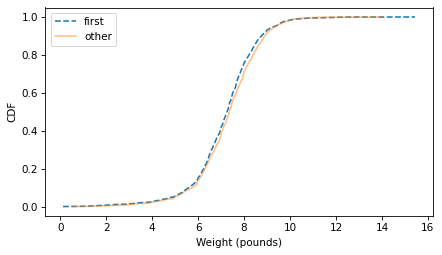

In [160]:
first_cdf.plot(ls="--")
other_cdf.plot(alpha=0.5)
decorate(xlabel="Weight (pounds)", ylabel="CDF")

In [161]:
from nsfg import read_stata

dct_file = "2002FemPreg.dct"
dat_file = "2002FemPreg.dat.gz"

preg = read_stata(dct_file, dat_file)

In [162]:
birthwgt_lb = preg["birthwgt_lb"]
birthwgt_oz = preg["birthwgt_oz"]

In [163]:
from empiricaldist import Hist

Hist.from_seq(birthwgt_oz).tail(5)

,
birthwgt_oz,
14.0,475
15.0,378
97.0,1
98.0,1
99.0,46


In [164]:
Hist.from_seq(birthwgt_lb).tail(5)


,
birthwgt_lb,
15.0,1
51.0,1
97.0,1
98.0,1
99.0,57


In [165]:
birthwgt_lb_clean = birthwgt_lb.replace([51, 97, 98, 99], np.nan)
birthwgt_oz_clean = birthwgt_oz.replace([97, 98, 99], np.nan)

total_weight_clean = birthwgt_lb_clean + birthwgt_oz_clean / 16

In [166]:
total_weight_bogus = birthwgt_lb + birthwgt_oz / 16


In [167]:
total_weight_bogus = birthwgt_lb + birthwgt_oz / 16


In [168]:
total_weight_bogus

,0
0,8.8125
1,7.8750
2,9.1250
3,7.0000
4,6.1875
...,...
13588,6.1875
13589,NaN
13590,NaN
13591,7.5000


In [169]:
count1, count2 = total_weight_bogus.count(), total_weight_clean.count()


In [170]:
diff = count1 - count2


In [171]:
diff

np.int64(49)

In [172]:
diff, diff / count2 * 100


(np.int64(49), np.float64(0.5421553441026776))

In [173]:
mean1, mean2 = total_weight_bogus.mean(), total_weight_clean.mean()
mean1, mean2

(np.float64(7.319680587652691), np.float64(7.265628457623368))

In [174]:
(mean1 - mean2) / mean2 * 100


np.float64(0.74394294099376)

In [175]:
std1, std2 = total_weight_bogus.std(), total_weight_clean.std()
std1, std2

(2.0960017791618313, 1.4082934455690168)

In [176]:
def skewness(seq):
    """Compute the skewness of a sequence

    seq: sequence of numbers

    returns: float skewness
    """
    deviations = seq - seq.mean()
    return np.mean(deviations**3) / seq.std(ddof=0) ** 3

In [177]:
skew1, skew2 = skewness(total_weight_bogus), skewness(total_weight_clean)
skew1, skew2

(np.float64(22.251846195422598), np.float64(-0.5895062687577703))

In [178]:
# how much is skew1 off by?
(skew1 - skew2) / skew2

np.float64(-38.74658112171143)

In [179]:
cdf_total_weight_bogus = Cdf.from_seq(total_weight_bogus)
cdf_total_weight_clean = Cdf.from_seq(total_weight_clean)

In [180]:
def median(cdf):
    m = cdf.inverse(0.5)
    return m

In [181]:
median(cdf_total_weight_bogus), median(cdf_total_weight_clean)


(array(7.375), array(7.375))

In [182]:
def iqr(cdf):
    low, high = cdf.inverse([0.25, 0.75])
    return high - low

In [183]:
iqr(cdf_total_weight_bogus), iqr(cdf_total_weight_clean)


(np.float64(1.625), np.float64(1.625))

In [184]:
def quartile_skewness(cdf):
    low, median, high = cdf.inverse([0.25, 0.5, 0.75])
    midpoint = (high + low) / 2
    semi_iqr = (high - low) / 2
    return (midpoint - median) / semi_iqr

In [185]:
qskew1 = quartile_skewness(cdf_total_weight_bogus)
qskew2 = quartile_skewness(cdf_total_weight_clean)
qskew1, qskew2

(np.float64(-0.07692307692307693), np.float64(-0.07692307692307693))

In [186]:
def sample_from_cdf(cdf, n):
    ps = np.random.random(size=n)
    return cdf.inverse(ps)

In [187]:
sample = sample_from_cdf(cdf_speeds, 1001)


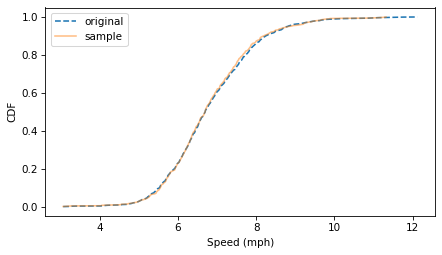

In [188]:
cdf_sample = Cdf.from_seq(sample)

cdf_speeds.plot(label="original", ls="--")
cdf_sample.plot(label="sample", alpha=0.5)

decorate(xlabel="Speed (mph)", ylabel="CDF")

In [189]:
percentile_ranks = cdf_speeds(sample) * 100


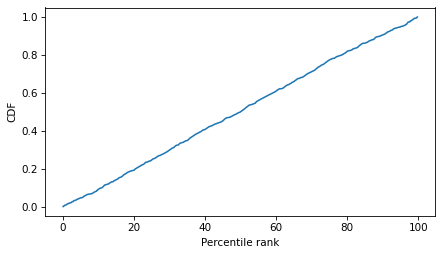

In [190]:
cdf_percentile_rank = Cdf.from_seq(percentile_ranks)
cdf_percentile_rank.plot()

decorate(xlabel="Percentile rank", ylabel="CDF")

In [191]:
sample = cdf_speeds.sample(1001)


In [192]:
def flip(n, p):
    choices = [1, 0]
    probs = [p, 1 - p]
    return np.random.choice(choices, n, p=probs)

In [193]:
np.random.seed(1)


In [194]:
flip(25, 0.9)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [195]:
from empiricaldist import Pmf

seq = flip(1000, 0.9)
pmf = Pmf.from_seq(seq)
pmf

,
0,0.101
1,0.899


In [196]:
def simulate_round(n, p):
    seq = flip(n, p)
    return seq.sum()

In [197]:
n = 25
p = 0.9
results_sim = [simulate_round(n, p) for i in range(1000)]

In [198]:
np.mean(results_sim), n * p


(np.float64(22.522), 22.5)

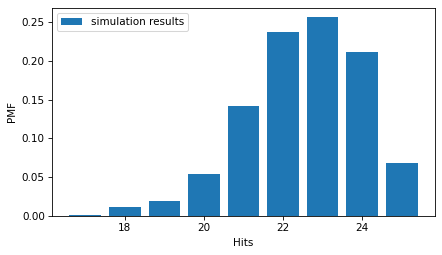

In [199]:
from empiricaldist import Pmf

pmf_sim = Pmf.from_seq(results_sim, name="simulation results")

pmf_sim.bar()
decorate(xlabel="Hits", ylabel="PMF")

In [200]:
from scipy.special import comb


def binomial_pmf(k, n, p):
    return comb(n, k) * (p**k) * ((1 - p) ** (n - k))

In [201]:
ks = np.arange(16, n + 1)
ps = binomial_pmf(ks, n, p)
pmf_binom = Pmf(ps, ks, name="binomial model")

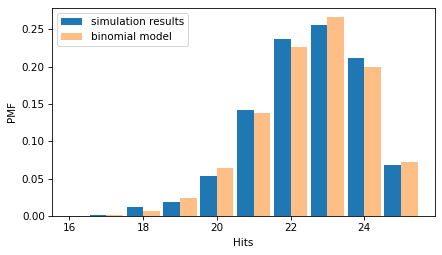

In [202]:
from thinkstats import two_bar_plots

two_bar_plots(pmf_sim, pmf_binom)
decorate(xlabel="Hits", ylabel="PMF")

In [203]:
filename = "Shooting_at_the_2020_Summer_Olympics_Mens_skeet"

In [204]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/" + filename)


Downloaded Shooting_at_the_2020_Summer_Olympics_Mens_skeet


In [205]:
tables = pd.read_html(filename)
table = tables[6]
table.head()

,Rank,Athlete,Country,1,2,3,4,5,Total[3],Shoot-off,Notes
0,1,Éric Delaunay,France,25,25,25,24,25,124,+6,"Q, OR"
1,2,Tammaro Cassandro,Italy,24,25,25,25,25,124,+5,"Q, OR"
2,3,Eetu Kallioinen,Finland,25,25,24,25,24,123,NaN,Q
3,4,Vincent Hancock,United States,25,25,25,25,22,122,+8,Q
4,5,Abdullah Al-Rashidi,Kuwait,25,25,24,25,23,122,+7,Q


In [206]:
columns = ["1", "2", "3", "4", "5"]
results = table[columns].values.flatten()

In [207]:
results

array([25, 25, 25, 24, 25, 24, 25, 25, 25, 25, 25, 25, 24, 25, 24, 25, 25,
       25, 25, 22, 25, 25, 24, 25, 23, 25, 24, 23, 25, 25, 24, 25, 25, 25,
       23, 24, 24, 25, 25, 24, 25, 24, 24, 25, 24, 23, 25, 24, 24, 25, 23,
       25, 24, 24, 25, 24, 25, 24, 23, 25, 24, 25, 24, 24, 24, 25, 24, 25,
       23, 24, 24, 24, 23, 24, 25, 24, 24, 23, 24, 25, 25, 23, 25, 23, 24,
       24, 25, 24, 23, 24, 23, 22, 22, 24, 23, 23, 24, 23, 24, 25, 25, 25,
       23, 22, 24, 24, 24, 23, 25, 23, 25, 24, 23, 24, 23, 24, 23, 23, 23,
       24, 25, 24, 22, 23, 23, 25, 23, 23, 22, 23, 23, 23, 23, 22, 23, 23,
       25, 23, 24, 19, 23, 22, 22, 25, 20, 21, 22, 22, 23, 19])

In [208]:
total_shots = 25 * len(results)
total_hits = results.sum()
n, total_shots, total_hits

(25, 3750, np.int64(3575))

In [209]:
p = total_hits / total_shots
p

np.float64(0.9533333333333334)

In [210]:
ps = binomial_pmf(ks, n, p)
pmf_binom = Pmf(ps, ks, name="binomial model")

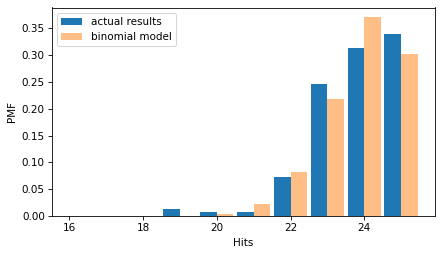

In [211]:
pmf_results = Pmf.from_seq(results, name="actual results")

two_bar_plots(pmf_results, pmf_binom)
decorate(xlabel="Hits", ylabel="PMF")

In [212]:
n = 3600
m = 6
p = m / 3600
p

0.0016666666666666668

In [213]:
def simulate_goals(n, p):
    return flip(n, p).sum()

In [214]:
goals = [simulate_goals(n, p) for i in range(1001)]
np.mean(goals)

np.float64(6.021978021978022)

In [215]:
from scipy.special import factorial


def poisson_pmf(k, lam):
    """Compute the Poisson PMF.

    k (int or array-like): The number of occurrences
    lam (float): The rate parameter (λ) of the Poisson distribution

    returns: float or ndarray
    """
    return (lam**k) * np.exp(-lam) / factorial(k)

In [216]:
lam = 6
ks = np.arange(20)
ps = poisson_pmf(ks, lam)
pmf_poisson = Pmf(ps, ks, name="Poisson model")

In [217]:
pmf_poisson.normalize()
pmf_poisson.mean()

np.float64(5.999925498375129)

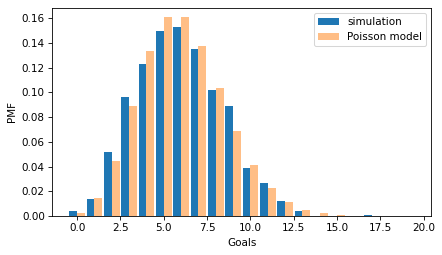

In [218]:
pmf_sim = Pmf.from_seq(goals, name="simulation")

two_bar_plots(pmf_sim, pmf_poisson)
decorate(xlabel="Goals", ylabel="PMF")

In [219]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/nhl_2023_2024.hdf")


Downloaded nhl_2023_2024.hdf


In [220]:
filename = "nhl_2023_2024.hdf"

with pd.HDFStore(filename, "r") as store:
    keys = store.keys()

len(keys), keys[0]

(1312, '/202310100PIT')

In [221]:
times = pd.read_hdf(filename, key=keys[0])
times

,0
0,424
1,1916
2,2137
3,3005
4,3329
5,3513


In [222]:
3600 - times[5]


np.int64(87)

In [223]:
goals = []

for key in keys:
    times = pd.read_hdf(filename, key=key)
    n = len(times)
    goals.append(n)

In [224]:
lam = np.mean(goals)
lam

np.float64(6.0182926829268295)

In [225]:
ps = poisson_pmf(ks, lam)
pmf_poisson = Pmf(ps, ks, name="Poisson model")

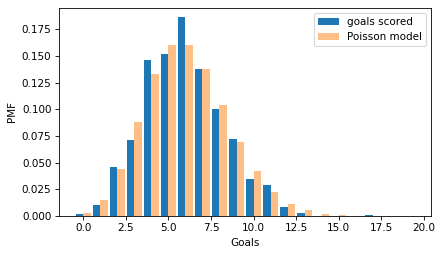

In [226]:
pmf_goals = Pmf.from_seq(goals, name="goals scored")

two_bar_plots(pmf_goals, pmf_poisson)
decorate(xlabel="Goals", ylabel="PMF")

In [227]:
n = 3600
m = 6
p = m / 3600
p

0.0016666666666666668

In [228]:
def simulate_first_goal(n, p):
    return flip(n, p).argmax()

In [229]:
np.random.seed(3)


In [230]:
first_goal_times = [simulate_first_goal(n, p) for i in range(1001)]
mean = np.mean(first_goal_times)
mean

np.float64(597.7902097902098)

In [231]:
def exponential_cdf(x, lam):
    """Compute the exponential CDF.

    x: float or sequence of floats
    lam: rate parameter

    returns: float or NumPy array of cumulative probability
    """
    return 1 - np.exp(-lam * x)

In [232]:
lam = 1 / mean
lam

np.float64(0.0016728276636563566)

In [233]:
from empiricaldist import Cdf

ts = np.linspace(0, 3600, 201)
ps = exponential_cdf(ts, lam)
cdf_expo = Cdf(ps, ts, name="exponential model")

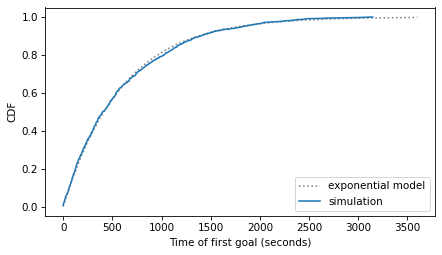

In [234]:
cdf_sim = Cdf.from_seq(first_goal_times, name="simulation")

cdf_expo.plot(ls=":", color="gray")
cdf_sim.plot()

decorate(xlabel="Time of first goal (seconds)", ylabel="CDF")

In [235]:
filename = "nhl_2023_2024.hdf"

with pd.HDFStore(filename, "r") as store:
    keys = store.keys()

In [236]:
firsts = []

for key in keys:
    times = pd.read_hdf(filename, key=key)
    if len(times) > 0:
        firsts.append(times[0])
    else:
        firsts.append(np.nan)

In [237]:
lam = 1 / np.nanmean(firsts)
lam

np.float64(0.0015121567467720825)

In [238]:
ps = exponential_cdf(ts, lam)
cdf_expo = Cdf(ps, ts, name="exponential model")

In [239]:
cdf_firsts = Cdf.from_seq(firsts, name="data", dropna=False)
cdf_firsts.tail()

,data
3286.0,0.996951
3581.0,0.997713
NaN,1.000000


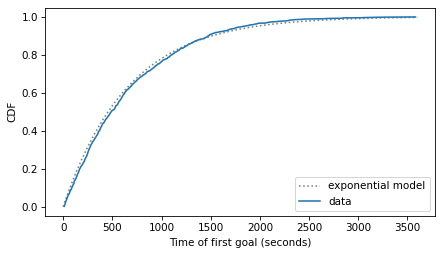

In [240]:
cdf_expo.plot(ls=":", color="gray")
cdf_firsts.plot()

decorate(xlabel="Time of first goal (seconds)", ylabel="CDF")

In [241]:
def simulate_growth(n):
    choices = [1, 2, 3]
    gains = np.random.choice(choices, n)
    return gains.sum()


In [242]:
sim_weights = [simulate_growth(100) for i in range(1001)]
m, s = np.mean(sim_weights), np.std(sim_weights)
m, s

(np.float64(199.37062937062936), np.float64(8.388630840376777))

In [243]:
from scipy.stats import norm


def make_normal_model(data):
    m, s = np.mean(data), np.std(data)
    low, high = m - 4 * s, m + 4 * s
    qs = np.linspace(low, high, 201)
    ps = norm.cdf(qs, m, s)
    return Cdf(ps, qs, name="normal model")

In [244]:
cdf_model = make_normal_model(sim_weights)

In [245]:
def two_cdf_plots(cdf_model, cdf_data, xlabel="", **options):
    cdf_model.plot(ls=":", color="gray")
    cdf_data.plot(**options)
    decorate(xlabel=xlabel, ylabel="CDF")

In [246]:
cdf_sim_weights = Cdf.from_seq(sim_weights, name="simulation")


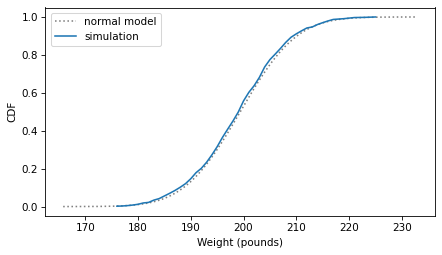

In [247]:
two_cdf_plots(cdf_model, cdf_sim_weights, xlabel="Weight (pounds)")


In [248]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

In [249]:
import nsfg

preg = nsfg.read_fem_preg()
birth_weights = preg["totalwgt_lb"].dropna()

In [250]:
m, s = np.mean(birth_weights), np.std(birth_weights)


In [251]:
from scipy.stats import trimboth

trimmed = trimboth(birth_weights, 0.01)
m, s = np.mean(trimmed), np.std(trimmed)
m, s

(np.float64(7.280883100022579), np.float64(1.2430657948614345))

In [252]:
cdf_model = make_normal_model(trimmed)


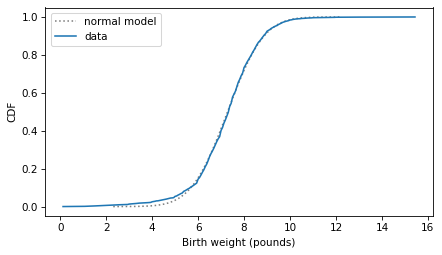

In [253]:
cdf_birth_weight = Cdf.from_seq(birth_weights, name='data')

two_cdf_plots(cdf_model, cdf_birth_weight, xlabel="Birth weight (pounds)")

In [254]:
def simulate_proportionate_growth(n):
    choices = [1.03, 1.05, 1.07]
    gains = np.random.choice(choices, n)
    return gains.prod()

In [255]:
sim_weights = [simulate_proportionate_growth(100) for i in range(1001)]
np.mean(sim_weights), np.std(sim_weights)

(np.float64(130.80183363824722), np.float64(20.956047434921466))

In [256]:
log_sim_weights = np.log10(sim_weights)
m, s = np.mean(log_sim_weights), np.std(log_sim_weights)
m, s

(np.float64(2.1111299372609933), np.float64(0.06898607064749827))

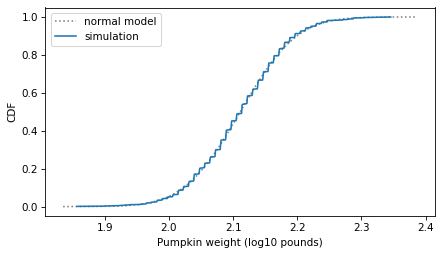

In [257]:
cdf_model = make_normal_model(log_sim_weights)
cdf_log_sim_weights = Cdf.from_seq(log_sim_weights, name="simulation")

two_cdf_plots(
    cdf_model, cdf_log_sim_weights, xlabel="Pumpkin weight (log10 pounds)"
)

In [258]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/CDBRFS08.ASC.gz")

Downloaded CDBRFS08.ASC.gz


In [259]:
from thinkstats import read_brfss

brfss = read_brfss()

In [260]:
adult_weights = brfss["wtkg2"].dropna()
m, s = np.mean(adult_weights), np.std(adult_weights)
m, s

(np.float64(78.9924529968581), 19.54613238740293)

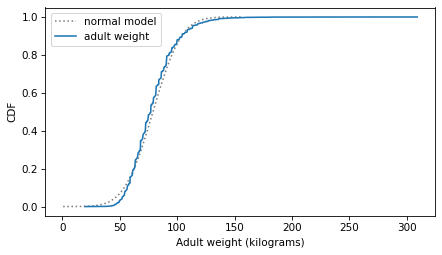

In [261]:
cdf_model = make_normal_model(adult_weights)
cdf_adult_weights = Cdf.from_seq(adult_weights, name="adult weight")

two_cdf_plots(cdf_model, cdf_adult_weights, xlabel="Adult weight (kilograms)")

In [262]:
log_adult_weights = np.log10(adult_weights)
cdf_model = make_normal_model(log_adult_weights)

cdf_log_adult_weights = Cdf.from_seq(log_adult_weights, name="log adult weight")

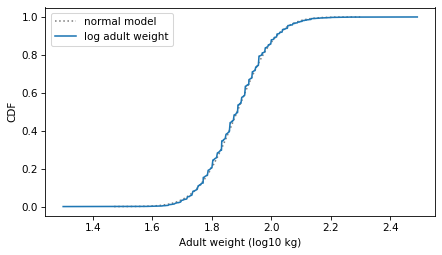

In [263]:
two_cdf_plots(cdf_model, cdf_log_adult_weights, xlabel="Adult weight (log10 kg)")


In [264]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [265]:
try:
    import statadict
except ImportError:
    %pip install statadict

In [266]:
from nsfg import read_fem_resp

resp = read_fem_resp()

In [267]:
older = resp.query("age >= 25")
num_family = older["numfmhh"]

In [268]:
from empiricaldist import Pmf

pmf_family = Pmf.from_seq(num_family, name="data")

In [269]:
from thinkstats import poisson_pmf

lam = 2.2
ks = np.arange(11)
ps = poisson_pmf(ks, lam)

pmf_poisson = Pmf(ps, ks, name="Poisson model")

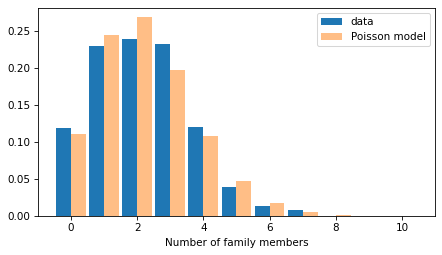

In [270]:
from thinkstats import two_bar_plots

two_bar_plots(pmf_family, pmf_poisson)
decorate(xlabel="Number of family members")

In [271]:
cdf_family = pmf_family.make_cdf()
cdf_poisson = pmf_poisson.make_cdf()

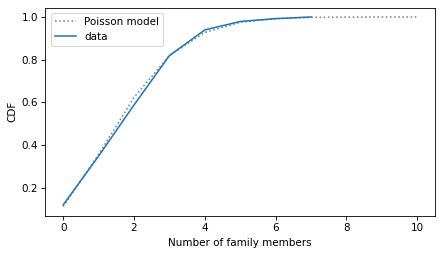

In [272]:
from thinkstats import two_cdf_plots

two_cdf_plots(cdf_poisson, cdf_family)
decorate(xlabel="Number of family members")

In [273]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

In [274]:
from nsfg import read_fem_preg

preg = read_fem_preg()
birth_weights = preg["totalwgt_lb"].dropna()

In [275]:
from scipy.stats import trimboth
from thinkstats import make_normal_model

trimmed = trimboth(birth_weights, 0.01)
cdf_model = make_normal_model(trimmed)

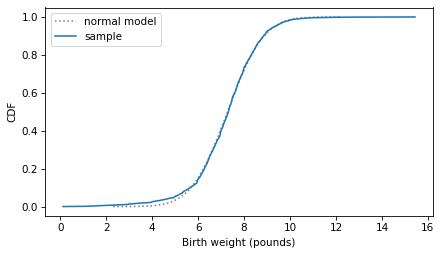

In [276]:
from empiricaldist import Cdf

cdf_birth_weight = Cdf.from_seq(birth_weights, name="sample")
two_cdf_plots(cdf_model, cdf_birth_weight, xlabel="Birth weight (pounds)")

In [277]:
def normal_pdf(xs, mu, sigma):
    """Evaluates the normal probability density function."""
    z = (xs - mu) / sigma
    return np.exp(-(z**2) / 2) / sigma / np.sqrt(2 * np.pi)

In [278]:
m, s = np.mean(trimmed), np.std(trimmed)


In [279]:
low = m - 4 * s
high = m + 4 * s
qs = np.linspace(low, high, 201)
ps = normal_pdf(qs, m, s)

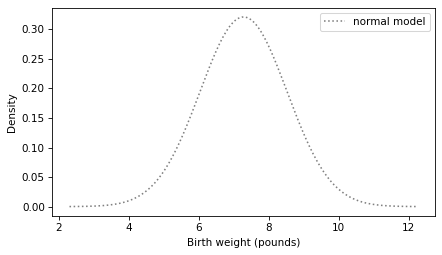

In [280]:
plt.plot(qs, ps, label="normal model", ls=":", color="gray")
decorate(xlabel="Birth weight (pounds)", ylabel="Density")

In [281]:
normal_pdf(m, m, s)

np.float64(0.32093416297880123)

In [282]:
from thinkstats import NormalPdf

pdf_model = NormalPdf(m, s, name="normal model")
pdf_model

NormalPdf(7.280883100022579, 1.2430657948614345, name='normal model')

In [283]:
pdf_model(m)


np.float64(0.32093416297880123)

In [284]:
from scipy.integrate import simpson


def area_under(pdf, low, high):
    qs = np.linspace(low, high, 501)
    ps = pdf(qs)
    return simpson(y=ps, x=qs)

In [285]:
area_under(pdf_model, 2, 12)


np.float64(0.9999158086616793)

In [286]:
area_under(pdf_model, 0, 8.5)

np.float64(0.8366380335513807)

In [287]:
from scipy.stats import norm

norm.cdf(8.5, m, s)

np.float64(0.8366380358092718)

In [288]:
from scipy.stats import norm

norm.cdf(8.5, m, s)

np.float64(0.8366380358092718)

In [289]:
area_under(pdf_model, 6, 8)

np.float64(0.5671317752927691)

In [290]:
norm.cdf(8, m, s) - norm.cdf(6, m, s)

np.float64(0.5671317752921801)

In [291]:
def exponential_pdf(x, lam):
    """Evaluates the exponential PDF.

    x: float or sequence of floats
    lam: rate parameter

    returns: float or NumPy array of probability density
    """
    return lam * np.exp(-lam * x)

In [292]:
from thinkstats import ExponentialPdf

lam = 6
pdf_expo = ExponentialPdf(lam, name="exponential model")
pdf_expo

ExponentialPdf(6, name='exponential model')

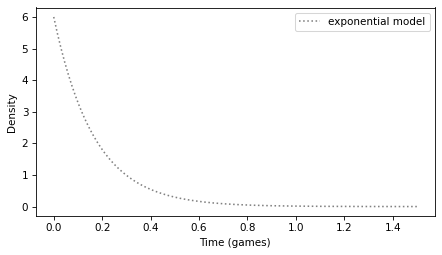

In [293]:
qs = np.linspace(0, 1.5, 201)
pdf_expo.plot(qs, ls=":", color="gray")
decorate(xlabel="Time (games)", ylabel="Density")

In [294]:
area_under(pdf_expo, 0, 1.5)


np.float64(0.999876590779019)

In [295]:
from thinkstats import exponential_cdf

exponential_cdf(7, lam)

np.float64(1.0)

In [296]:
area_under(pdf_expo, 0, 1 / 60)

np.float64(0.09516258196404043)

In [297]:
exponential_cdf(1 / 60, lam)

np.float64(0.09516258196404048)

In [298]:
pmf_birth_weight = Pmf.from_seq(birth_weights, name="data")


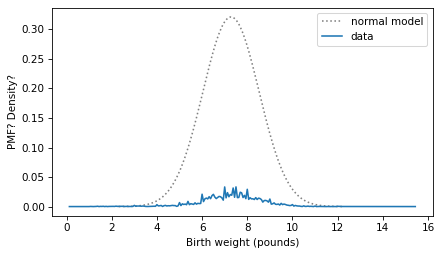

In [299]:
pdf_model.plot(ls=":", color="gray")
pmf_birth_weight.plot()

decorate(xlabel="Birth weight (pounds)", ylabel="PMF? Density?")

In [300]:
pmf_model = pdf_model.make_pmf()


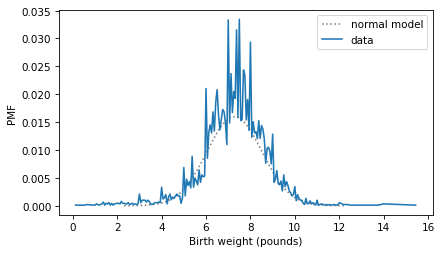

In [301]:
pmf_model.plot(ls=":", color="gray")
pmf_birth_weight.plot()

decorate(xlabel="Birth weight (pounds)", ylabel="PMF")

In [302]:
np.random.seed(3)


In [303]:
n = 10
sample = birth_weights.sample(n)

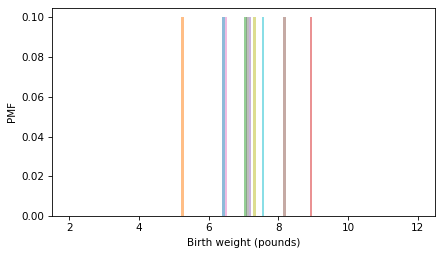

In [304]:
for weight in sample:
    pmf = Pmf.from_seq([weight]) / n
    pmf.bar(width=0.08, alpha=0.5)

xlim = [1.5, 12.5]
decorate(xlabel="Birth weight (pounds)", ylabel="PMF", xlim=xlim)

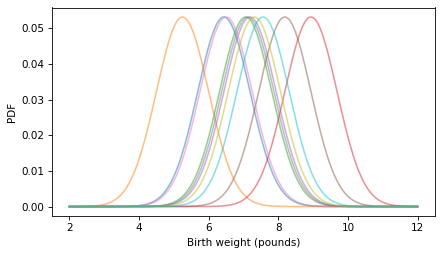

In [305]:
qs = np.linspace(2, 12, 201)

for weight in sample:
    ps = NormalPdf(weight, 0.75)(qs) / n
    plt.plot(qs, ps, alpha=0.5)

decorate(xlabel="Birth weight (pounds)", ylabel="PDF", xlim=xlim)

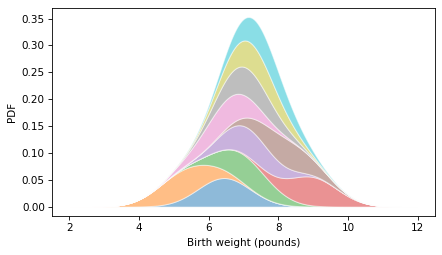

In [306]:
low_ps = np.zeros_like(qs)

for weight in sample:
    ps = NormalPdf(weight, 0.75)(qs) / n
    high_ps = low_ps + ps
    plt.fill_between(qs, low_ps, high_ps, alpha=0.5, lw=1, ec="white")
    low_ps = high_ps

decorate(xlabel="Birth weight (pounds)", ylabel="PDF", xlim=xlim)

In [307]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(birth_weights)

In [308]:
ps = kde(qs)


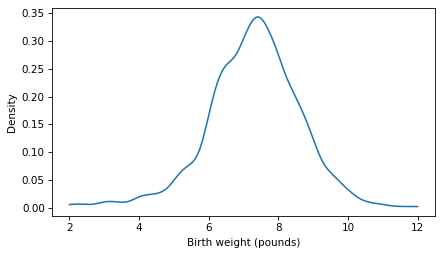

In [309]:
plt.plot(qs, ps)

decorate(xlabel="Birth weight (pounds)", ylabel="Density")

In [310]:
from thinkstats import Pdf

domain = np.min(birth_weights), np.max(birth_weights)
kde_birth_weights = Pdf(kde, domain, name="data")

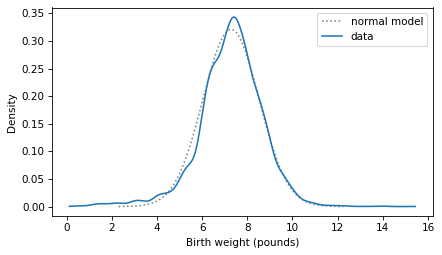

In [311]:
pdf_model.plot(ls=":", color="gray")
kde_birth_weights.plot()

decorate(xlabel="Birth weight (pounds)", ylabel="Density")

In [312]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/babyboom.dat")

Downloaded babyboom.dat


In [313]:
from thinkstats import read_baby_boom

boom = read_baby_boom()
boom.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [314]:
diffs = boom["minutes"].diff().dropna()

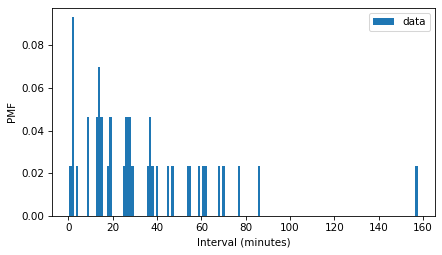

In [315]:
pmf_diffs = Pmf.from_seq(diffs, name="data")
pmf_diffs.bar(width=1)

decorate(xlabel="Interval (minutes)", ylabel="PMF")

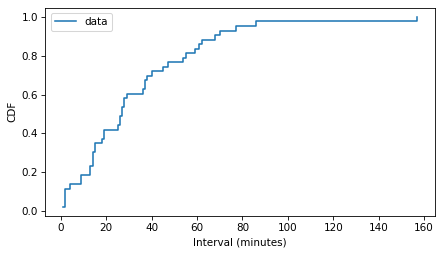

In [316]:
cdf_diffs = pmf_diffs.make_cdf()
cdf_diffs.step()

decorate(xlabel="Interval (minutes)", ylabel="CDF")

In [317]:
pmf_diffs2 = cdf_diffs.make_pmf()


In [318]:
np.allclose(pmf_diffs, pmf_diffs2)


True

In [319]:
kde = gaussian_kde(pmf_diffs.qs, weights=pmf_diffs.ps)

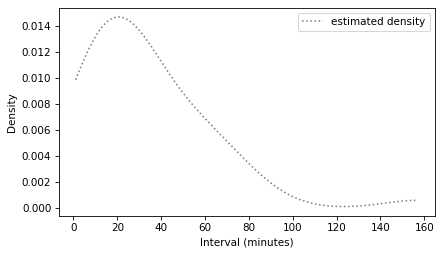

In [320]:
domain = np.min(pmf_diffs.qs), np.max(pmf_diffs.qs)
kde_diffs = Pdf(kde, domain=domain, name="estimated density")

kde_diffs.plot(ls=":", color="gray")
decorate(xlabel="Interval (minutes)", ylabel="Density")

In [321]:
from thinkstats import ExponentialCdf

m = diffs.mean()
lam = 1 / m
cdf_model = ExponentialCdf(lam, name="exponential CDF")

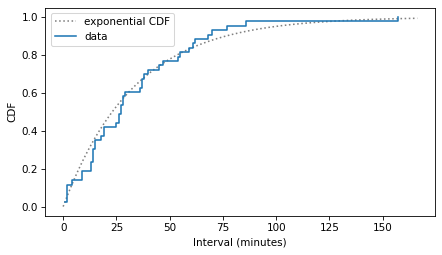

In [322]:
cdf_model.plot(ls=":", color="gray")
cdf_diffs.step()

decorate(xlabel="Interval (minutes)", ylabel="CDF")

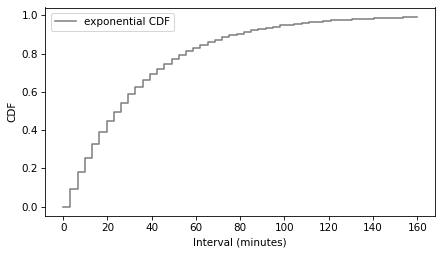

In [323]:
qs = np.linspace(0, 160)
discrete_cdf_model = cdf_model.make_cdf(qs)
discrete_cdf_model.step(color="gray")

decorate(xlabel="Interval (minutes)", ylabel="CDF")

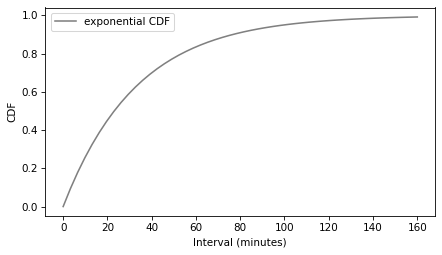

In [324]:
discrete_cdf_model.plot(color="gray")

decorate(xlabel="Interval (minutes)", ylabel="CDF")

In [325]:
import sympy as sp

x = sp.Symbol("x", real=True, positive=True)
λ = sp.Symbol("λ", real=True, positive=True)

cdf = 1 - sp.exp(-λ * x)
cdf

1 - exp(-x*λ)

In [326]:
pdf = sp.diff(cdf, x)
pdf

λ*exp(-x*λ)

In [327]:
sp.integrate(pdf, x)


-exp(-x*λ)

In [328]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [329]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/nlsy97-extract.csv.gz")

Downloaded nlsy97-extract.csv.gz


In [330]:
missing_codes = [-1, -2, -3, -4, -5]
nlsy = pd.read_csv("nlsy97-extract.csv.gz").replace(missing_codes, np.nan)
nlsy.shape

(8984, 34)

In [331]:
nlsy.head()

,R0000100,R0490200,R0536300,R0536401,R0536402,R1235800,R1318200,R1482600,R3961900,R3989200,...,R9872200,R9872300,R9872400,S1552700,U0008900,U1845500,U3444000,U4949700,Z9083800,Z9083900
0,1,NaN,2,9,1981,1,NaN,4,NaN,NaN,...,293.0,250.0,333.0,NaN,120000.0,NaN,NaN,NaN,16.0,4.0
1,2,NaN,1,7,1982,1,145.0,2,NaN,NaN,...,114.0,230.0,143.0,NaN,98928.0,116000.0,188857.0,180000.0,14.0,2.0
2,3,NaN,2,9,1983,1,82.0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75000.0,16.0,4.0
3,4,NaN,2,2,1981,1,NaN,2,NaN,NaN,...,195.0,230.0,216.0,NaN,85000.0,45000.0,NaN,NaN,13.0,2.0
4,5,NaN,1,10,1982,1,NaN,2,NaN,NaN,...,293.0,230.0,231.0,NaN,210000.0,212000.0,NaN,240000.0,12.0,2.0


In [332]:
nlsy["sat_verbal"] = nlsy["R9793800"]
nlsy["sat_math"] = nlsy["R9793900"]

In [333]:
columns = ["sat_verbal", "sat_math"]

for column in columns:
    invalid = nlsy[column] < 200
    nlsy.loc[invalid, column] = np.nan

In [334]:
nlsy_valid = nlsy.dropna(subset=columns).copy()
nlsy_valid.shape

(1398, 36)

In [335]:
sat_verbal = nlsy_valid["sat_verbal"]
sat_verbal.mean(), sat_verbal.std()

(np.float64(501.80972818311875), 108.36562024213649)

In [336]:
sat_math = nlsy_valid["sat_math"]
sat_math.mean(), sat_math.std()

(np.float64(503.0829756795422), 109.83299737314485)

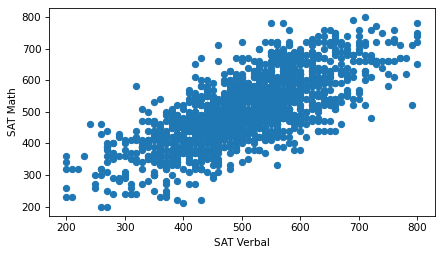

In [337]:
plt.scatter(sat_verbal, sat_math)

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

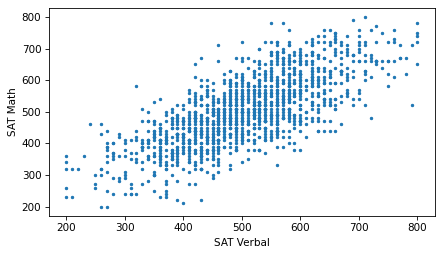

In [338]:
plt.scatter(sat_verbal, sat_math, s=5)

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

In [339]:
def jitter(seq, std=1):
    n = len(seq)
    return np.random.normal(0, std, n) + seq

In [340]:
sat_verbal_jittered = jitter(sat_verbal, 3)
sat_math_jittered = jitter(sat_math, 3)

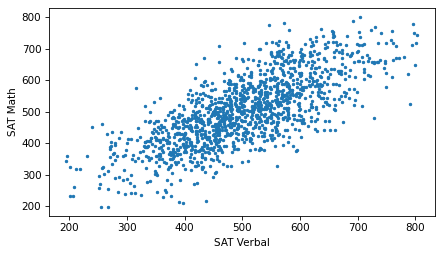

In [341]:
plt.scatter(sat_verbal_jittered, sat_math_jittered, s=5)

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

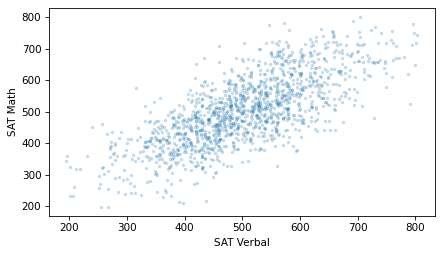

In [342]:
plt.scatter(sat_verbal_jittered, sat_math_jittered, s=5, alpha=0.2)

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

In [343]:
deciles = pd.qcut(nlsy_valid["sat_verbal"], 10, labels=False) + 1
deciles.value_counts().sort_index()

,count
sat_verbal,
1,142
2,150
3,139
4,140
5,159
6,130
7,148
8,121
9,138


In [344]:
df_groupby = nlsy_valid.groupby(deciles)
df_groupby

In [345]:
series_groupby = df_groupby["sat_math"]
series_groupby

In [346]:
low = series_groupby.quantile(0.1)
median = series_groupby.quantile(0.5)
high = series_groupby.quantile(0.9)

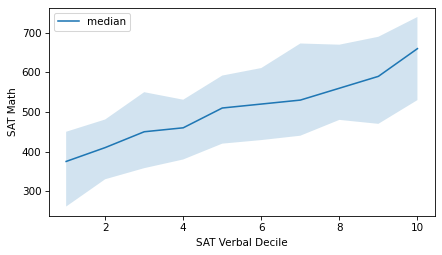

In [347]:
xs = median.index
plt.fill_between(xs, low, high, alpha=0.2)
plt.plot(xs, median, label="median")

decorate(xlabel="SAT Verbal Decile", ylabel="SAT Math")

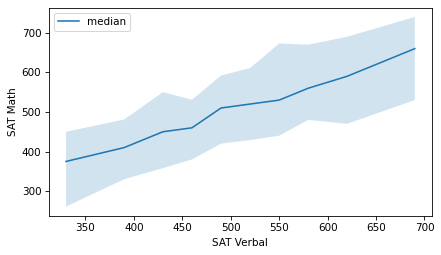

In [348]:
xs = df_groupby["sat_verbal"].median()

plt.fill_between(xs, low, high, alpha=0.2)
plt.plot(xs, median, color="C0", label="median")

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

In [349]:
nlsy["piat_math"] = nlsy["R1318200"]
nlsy["piat_math"].describe()

,piat_math
count,6044.000000
mean,93.903706
std,14.631148
min,55.000000
25%,84.000000
50%,92.000000
75%,103.000000
max,145.000000


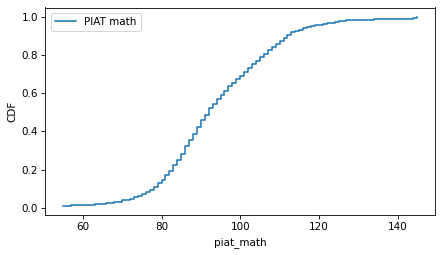

In [350]:
from empiricaldist import Cdf

cdf_piat_math = Cdf.from_seq(nlsy["piat_math"], name="PIAT math")
cdf_piat_math.step()
decorate(ylabel="CDF")

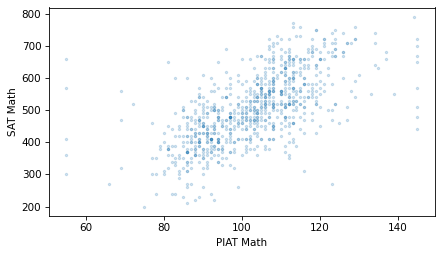

In [351]:
from thinkstats import scatter

scatter(nlsy, "piat_math", "sat_math")

decorate(xlabel="PIAT Math", ylabel="SAT Math")

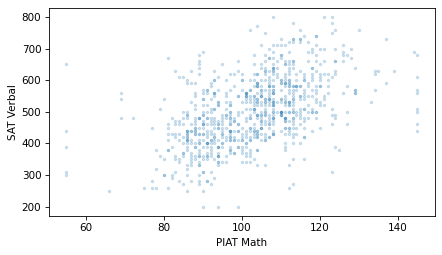

In [352]:
scatter(nlsy, "piat_math", "sat_verbal")

decorate(xlabel="PIAT Math", ylabel="SAT Verbal")

In [353]:
def standardize(xs):
    """Standardizes a sequence of numbers.

    xs: sequence of numbers

    returns: NumPy array
    """
    return (xs - np.mean(xs)) / np.std(xs)

In [354]:
valid = nlsy.dropna(subset=["piat_math", "sat_math"])
piat_math = valid["piat_math"]
sat_math = valid["sat_math"]


In [355]:
piat_math_standard = standardize(piat_math)
np.mean(piat_math_standard), np.std(piat_math_standard)

(np.float64(-2.2584487933695116e-16), 0.9999999999999988)

In [356]:
sat_math_standard = standardize(sat_math)
np.mean(sat_math_standard), np.std(sat_math_standard)

(np.float64(-1.737268302591932e-16), 1.000000000000001)

In [357]:
np.mean(piat_math_standard * sat_math_standard)

np.float64(0.6397358165178848)

In [358]:
np.corrcoef(piat_math, sat_math)


array([[1.        , 0.63973582],
       [0.63973582, 1.        ]])

In [359]:
from thinkstats import corrcoef

corrcoef(nlsy, "piat_math", "sat_math")

np.float64(0.6397358165178849)

In [360]:
np.random.seed(17)
xs = np.random.normal(size=300)
ys = np.random.normal(size=300)

In [361]:
nlsy["income"] = nlsy["U4949700"]
nlsy["income"].describe()

,income
count,6051.000000
mean,104274.239960
std,108470.571497
min,0.000000
25%,38000.000000
50%,80000.000000
75%,134157.000000
max,599728.000000


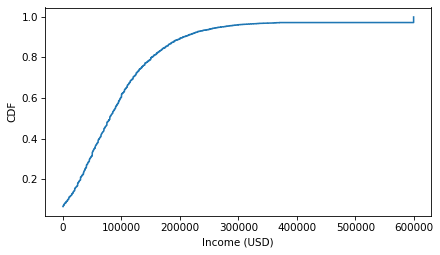

In [362]:
cdf_income = Cdf.from_seq(nlsy["income"])
cdf_income.step()

decorate(xlabel="Income (USD)", ylabel="CDF")

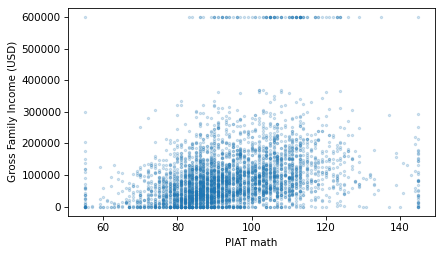

In [363]:
scatter(nlsy, "piat_math", "income")

decorate(xlabel="PIAT math", ylabel="Gross Family Income (USD)")

In [364]:
corrcoef(nlsy, "piat_math", "income")

np.float64(0.30338587288641233)

In [365]:
valid = nlsy.dropna(subset=["piat_math", "income"])

piat_math_rank = valid["piat_math"].rank(method="first")
income_rank = valid["income"].rank(method="first")

In [366]:
income_rank.min(), income_rank.max()


(1.0, 4101.0)

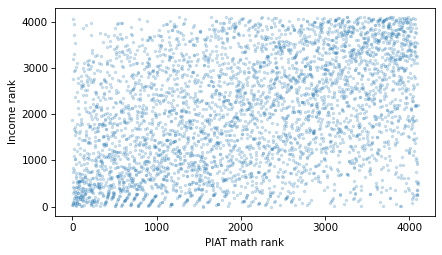

In [367]:

plt.scatter(piat_math_rank, income_rank, s=5, alpha=0.2)

decorate(xlabel="PIAT math rank", ylabel="Income rank")

In [368]:
np.corrcoef(piat_math_rank, income_rank)[0, 1]

np.float64(0.38148396696764847)

In [369]:
from thinkstats import rankcorr

rankcorr(nlsy, "piat_math", "income")

np.float64(0.38474681505344815)

In [370]:
from scipy.stats import spearmanr

spearmanr(valid["piat_math"], valid["income"]).statistic

np.float64(0.38474681505344815)

In [371]:
mu = 3.7
sigma = 0.46

In [372]:
# Seed the random number generator so we get the same results every time
np.random.seed(1)

In [374]:
sample = np.random.normal(mu, sigma, size=10)
sample

array([4.44719887, 3.41859205, 3.45704099, 3.20643443, 4.09808751,
       2.6412922 , 4.50261341, 3.34984483, 3.84675798, 3.58528963])

In [375]:
def make_sample(n):
    return np.random.normal(mu, sigma, size=n)

In [376]:
ns = np.logspace(1, 5).astype(int)

In [377]:
means = [np.mean(make_sample(n)) for n in ns]

In [378]:
medians = [np.median(make_sample(n)) for n in ns]

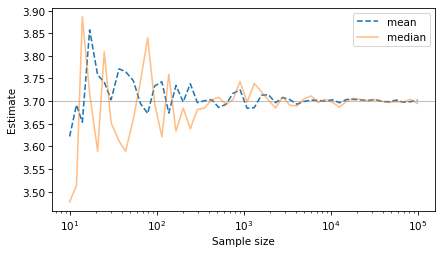

In [379]:
plt.axhline(mu, color="gray", lw=1, alpha=0.5)
plt.plot(ns, means, "--", label="mean")
plt.plot(ns, medians, alpha=0.5, label="median")

decorate(xlabel="Sample size", xscale="log", ylabel="Estimate")

In [380]:
means = [np.mean(make_sample(n=10)) for i in range(10001)]
np.mean(means)

np.float64(3.70034508492869)

In [381]:
medians = [np.median(make_sample(n=10)) for i in range(10001)]
np.mean(medians)

np.float64(3.701214089907223)

In [382]:
def mse(estimates, actual):
    """Mean squared error of a sequence of estimates."""
    errors = np.asarray(estimates) - actual
    return np.mean(errors**2)

In [383]:
mse(means, mu)


np.float64(0.020871984891289382)

In [384]:
np.float64(0.029022273128644173)

np.float64(0.029022273128644173)

In [385]:
def mae(estimates, actual):
    """Mean absolute error of a sequence of estimates."""
    errors = np.asarray(estimates) - actual
    return np.mean(np.abs(errors))

In [386]:
mae(means, mu)

np.float64(0.11540433749505272)

In [387]:
mae(medians, mu)

np.float64(0.13654429774596036)

In [389]:
def make_sample_with_errors(n):
    sample = np.random.normal(mu, sigma, size=n)
    factor = np.random.choice([1, 2.2], p=[0.98, 0.02], size=n)
    return sample * factor


In [390]:
sample = make_sample_with_errors(n=1000)


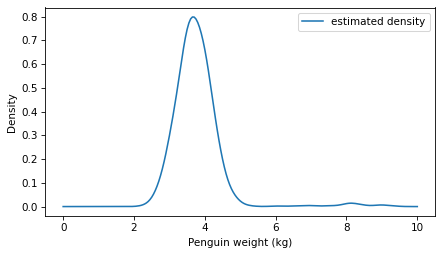

In [391]:
from scipy.stats import gaussian_kde
from thinkstats import Pdf

kde = gaussian_kde(sample)
domain = 0, 10
pdf = Pdf(kde, domain)
pdf.plot(label='estimated density')
decorate(xlabel="Penguin weight (kg)", ylabel="Density")

In [392]:
medians = [np.median(make_sample_with_errors(n=10)) for i in range(10001)]
np.mean(medians)

np.float64(3.71082288221378)

In [393]:
mse(means, mu), mse(medians, mu)

(np.float64(0.020871984891289382), np.float64(0.031037506454079624))

In [394]:
def biased_var(xs):
    # Compute variance with n in the denominator
    n = len(xs)
    deviations = xs - np.mean(xs)
    return np.sum(deviations**2) / n

In [395]:
biased_vars = [biased_var(make_sample(n=10)) for i in range(10001)]
np.mean(biased_vars)

np.float64(0.1901421006431248)

In [396]:
actual_var = sigma**2
actual_var

0.2116

In [397]:
def unbiased_var(xs):
    # Compute variance with n-1 in the denominator
    n = len(xs)
    deviations = xs - np.mean(xs)
    return np.sum(deviations**2) / (n - 1)

In [398]:
unbiased_vars = [unbiased_var(make_sample(n=10)) for i in range(10001)]
np.mean(unbiased_vars)

np.float64(0.2114392704230471)

In [399]:
download(
    "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins_raw.csv"
)

Downloaded penguins_raw.csv


In [400]:
penguins = pd.read_csv("penguins_raw.csv").dropna(subset=["Body Mass (g)"])
penguins.shape

(342, 17)

In [401]:
penguins["Species"].value_counts()

,count
Species,
Adelie Penguin (Pygoscelis adeliae),151
Gentoo penguin (Pygoscelis papua),123
Chinstrap penguin (Pygoscelis antarctica),68


In [402]:
chinstrap = penguins.query('Species.str.startswith("Chinstrap")')

In [403]:
def plot_kde(sample, name="estimated density", **options):
    kde = gaussian_kde(sample)
    m, s = np.mean(sample), np.std(sample)
    plt.axvline(m, color="gray", ls=":")

    domain = m - 4 * s, m + 4 * s
    pdf = Pdf(kde, domain, name)
    pdf.plot(**options)

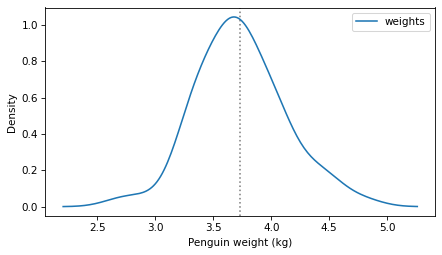

In [404]:
weights = chinstrap["Body Mass (g)"] / 1000
plot_kde(weights, "weights")
decorate(xlabel="Penguin weight (kg)", ylabel="Density")

In [405]:
sample_mean = np.mean(weights)
sample_mean

np.float64(3.733088235294118)

In [406]:
def resample(sample):
    # Generate a sample from a normal distribution
    m, s = np.mean(sample), np.std(sample)
    return np.random.normal(m, s, len(sample))

In [407]:
sample_means = [np.mean(resample(weights)) for i in range(1001)]

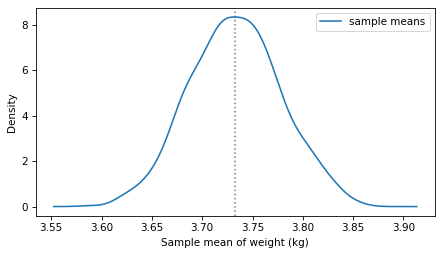

In [408]:
plot_kde(sample_means, "sample means")
decorate(xlabel="Sample mean of weight (kg)", ylabel="Density")

In [409]:
standard_error = np.std(sample_means)
standard_error

np.float64(0.045101159528821974)

In [410]:
def approximate_standard_error(sample):
    n = len(sample)
    return np.std(sample) / np.sqrt(n)

In [411]:
approximate_standard_error(weights)


np.float64(0.046263503290595163)

In [412]:
np.std(sample_means)


np.float64(0.045101159528821974)

In [414]:
ci90 = np.percentile(sample_means, [5, 95])
ci90

array([3.6604925 , 3.80971424])

In [415]:
n = 250
p = 0.5


def abs_deviation(heads):
    expected = n * p
    return np.abs(heads - expected)

In [416]:
heads = 140
tails = 110

observed_stat = abs_deviation(heads)
observed_stat

np.float64(15.0)

In [417]:
def simulate_flips():
    flips = np.random.choice(["H", "T"], size=n)
    heads = np.sum(flips == "H")
    return heads

In [418]:
np.random.seed(1)

In [419]:
simulate_flips()

np.int64(119)

In [420]:
simulated_stats = [abs_deviation(simulate_flips()) for i in range(10001)]

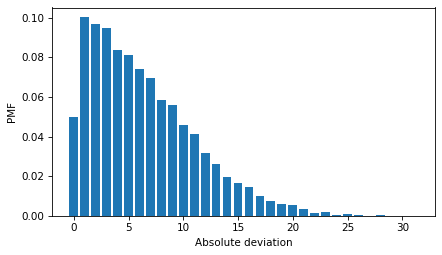

In [421]:
from empiricaldist import Pmf

pmf_effects = Pmf.from_seq(simulated_stats)
pmf_effects.bar()

decorate(xlabel="Absolute deviation", ylabel="PMF")

In [422]:
(np.array(simulated_stats) >= 15).mean() * 100

np.float64(7.079292070792921)

In [423]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

In [424]:
from nsfg import get_nsfg_groups

live, firsts, others = get_nsfg_groups()

In [425]:
data = firsts["prglngth"].values, others["prglngth"].values

In [426]:
def abs_diff_means(data):
    group1, group2 = data
    diff = np.mean(group1) - np.mean(group2)
    return np.abs(diff)

In [427]:
observed_diff = abs_diff_means(data)
observed_diff

np.float64(0.07803726677754952)

In [428]:
def simulate_groups(data):
    group1, group2 = data
    n, m = len(group1), len(group2)

    pool = np.hstack(data)
    np.random.shuffle(pool)
    return pool[:n], pool[-m:]

In [429]:
abs_diff_means(simulate_groups(data))

np.float64(0.031193045602279312)

In [430]:
simulated_diffs = [abs_diff_means(simulate_groups(data)) for i in range(1001)]

In [431]:
from scipy.stats import gaussian_kde
from empiricaldist import Pmf


def make_pmf(sample, low, high):
    kde = gaussian_kde(sample)
    qs = np.linspace(low, high, 201)
    ps = kde(qs)
    return Pmf(ps, qs)

In [432]:
from thinkstats import underride


def fill_tail(pmf, observed, side, **options):
    """Fill the area under a PMF, right or left of an observed value."""
    options = underride(options, alpha=0.3)

    if side == "right":
        condition = pmf.qs >= observed
    elif side == "left":
        condition = pmf.qs <= observed

    series = pmf[condition]
    plt.fill_between(series.index, 0, series, **options)

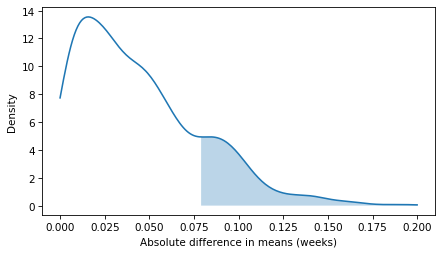

In [433]:
pmf = make_pmf(simulated_diffs, 0, 0.2)
pmf.plot()
fill_tail(pmf, observed_diff, "right")
decorate(xlabel="Absolute difference in means (weeks)", ylabel="Density")

In [434]:
def compute_p_value(simulated, observed):
    """Fraction of simulated values as big or bigger than the observed value."""
    return (np.asarray(simulated) >= observed).mean()

In [435]:
compute_p_value(simulated_diffs, observed_diff)

np.float64(0.1838161838161838)

In [436]:
compute_p_value(simulated_diffs, observed_diff)

np.float64(0.1838161838161838)

In [437]:
def compute_p_value(simulated, observed):
    """Fraction of simulated values as big or bigger than the observed value."""
    return (np.asarray(simulated) >= observed).mean()

In [438]:
compute_p_value(simulated_diffs, observed_diff)

np.float64(0.1838161838161838)

In [439]:
def abs_diff_stds(data):
    group1, group2 = data
    diff = np.std(group1) - np.std(group2)
    return np.abs(diff)

In [440]:
observed_diff = abs_diff_stds(data)
observed_diff

np.float64(0.17600895913991677)

In [441]:
simulated_diffs = [abs_diff_stds(simulate_groups(data)) for i in range(1001)]

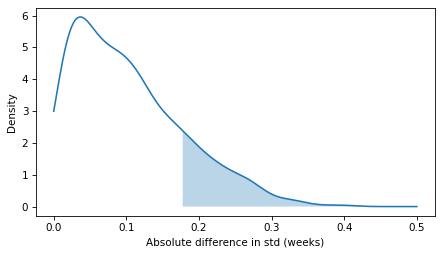

In [442]:
pmf = make_pmf(simulated_diffs, 0, 0.5)
pmf.plot()
fill_tail(pmf, observed_diff, "right")
decorate(xlabel="Absolute difference in std (weeks)", ylabel="Density")

In [443]:
compute_p_value(simulated_diffs, observed_diff)

np.float64(0.17082917082917082)

In [444]:
valid = live.dropna(subset=["agepreg", "totalwgt_lb"])
valid.shape

(9038, 244)

In [445]:
ages = valid["agepreg"]
birthweights = valid["totalwgt_lb"]

In [446]:
def abs_correlation(data):
    xs, ys = data
    corr = np.corrcoef(xs, ys)[0, 1]
    return np.abs(corr)

In [447]:
data = ages, birthweights
observed_corr = abs_correlation(data)
observed_corr

np.float64(0.0688339703541091)

In [448]:
def permute(data):
    xs, ys = data
    new_xs = xs.values.copy()
    np.random.shuffle(new_xs)
    return new_xs, ys

In [449]:
abs_correlation(permute(data))

np.float64(0.0019269515502894237)

In [450]:
simulated_corrs = [abs_correlation(permute(data)) for i in range(1001)]

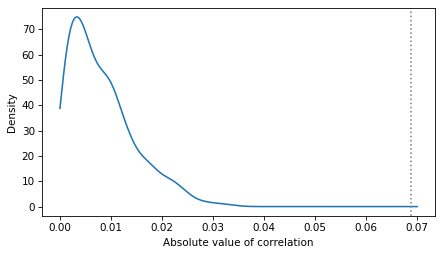

In [451]:
pmf = make_pmf(simulated_corrs, 0, 0.07)
pmf.plot()
plt.axvline(observed_corr, color="gray", ls=":")
decorate(xlabel="Absolute value of correlation", ylabel="Density")

In [452]:
compute_p_value(simulated_corrs, observed_corr)

np.float64(0.0)

In [453]:
compute_p_value(simulated_corrs, observed_corr)

np.float64(0.0)

In [454]:
from empiricaldist import Hist

qs = np.arange(1, 7)
freqs = [8, 9, 19, 5, 8, 11]
observed = Hist(freqs, qs)
observed.index.name = "outcome"
observed

,0
outcome,
1,8
2,9
3,19
4,5
5,8
6,11


In [455]:
from empiricaldist import Hist

qs = np.arange(1, 7)
freqs = [8, 9, 19, 5, 8, 11]
observed = Hist(freqs, qs)
observed.index.name = "outcome"
observed

,0
outcome,
1,8
2,9
3,19
4,5
5,8
6,11


In [456]:
num_rolls = observed.sum()
outcomes = observed.qs
expected = Hist(num_rolls / 6, outcomes)

In [462]:
def total_abs_deviation(observed):
    return np.sum(np.abs(observed - expected))

In [458]:
observed_dev = total_abs_deviation(observed)
observed_dev

np.float64(20.0)

In [459]:
def simulate_dice(observed):
    num_rolls = np.sum(observed)
    rolls = np.random.choice(observed.qs, num_rolls, replace=True)
    hist = Hist.from_seq(rolls)
    return hist

In [463]:
observed_dev = total_abs_deviation(observed)
observed_dev

simulated_devs = [total_abs_deviation(simulate_dice(observed)) for i in range(1001)]


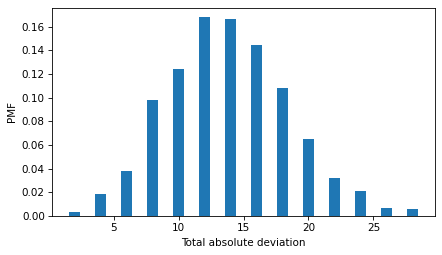

In [464]:
pmf_devs = Pmf.from_seq(simulated_devs)
pmf_devs.bar()

decorate(xlabel="Total absolute deviation", ylabel="PMF")

In [465]:
compute_p_value(simulated_devs, observed_dev)

np.float64(0.13086913086913088)

In [466]:
def chi_squared_stat(observed):
    diffs = (observed - expected) ** 2
    return np.sum(diffs / expected)

In [467]:
observed_chi2 = chi_squared_stat(observed)
observed_chi2

np.float64(11.6)

In [468]:
simulated_chi2 = [chi_squared_stat(simulate_dice(observed)) for i in range(1001)]

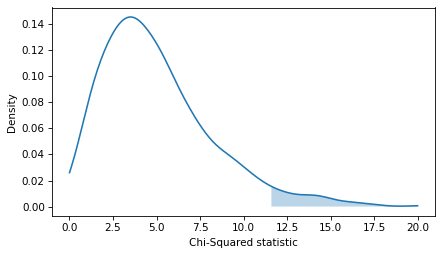

In [469]:
pmf = make_pmf(simulated_chi2, 0, 20)
pmf.plot()
fill_tail(pmf, observed_chi2, "right")
decorate(xlabel="Chi-Squared statistic", ylabel="Density")

In [470]:
compute_p_value(simulated_chi2, observed_chi2)

np.float64(0.04495504495504495)